In [1]:
!pip install seaborn

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import resample

In [25]:
labels=pd.read_csv('unbalanced_keypoints.csv')

frequency=labels['States'].value_counts()
frequency

sleeping    700
sitting     379
running     190
Name: States, dtype: int64

Text(0, 0.5, 'Frequency')

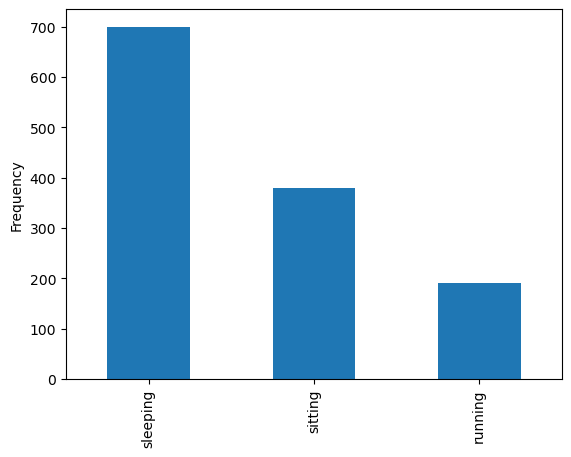

In [26]:
frequency.plot(kind='bar')
plt.ylabel('Frequency')

In [27]:
labels_majority = labels[labels["States"]=='sleeping']
labels_minority_1 = labels[labels['States']=='sitting']
labels_minority_2 = labels[labels['States']=='running'] 

In [28]:
labels_majority

,Images_name,NOSE_x,NOSE_y,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_OUTER_x,LEFT_EYE_OUTER_y,RIGHT_EYE_INNER_x,...,RIGHT_ANKLE_y,LEFT_HEEL_x,LEFT_HEEL_y,RIGHT_HEEL_x,RIGHT_HEEL_y,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,States
1,Image_4.jpg,0.473662,0.543170,0.436799,0.478599,0.442560,0.452585,0.448752,0.427095,0.420177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleeping
2,Image_6.jpg,0.454886,0.649072,0.406409,0.577923,0.411197,0.556714,0.415906,0.534641,0.394150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleeping
3,Image_15.jpg,0.578598,0.583863,0.554266,0.465202,0.565419,0.430133,0.576817,0.397384,0.523308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleeping
6,Image_45.jpg,0.308929,0.490504,0.307157,0.436079,0.317105,0.417441,0.330486,0.394302,0.285902,...,NaN,0.807765,0.64457,NaN,NaN,0.867153,0.617434,NaN,NaN,sleeping
7,Image_48.jpg,0.587567,0.402782,0.587389,0.410614,0.584220,0.418460,0.581173,0.426342,0.586481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleeping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,Image_12462.jpg,0.467931,0.232938,0.524314,0.217578,0.540606,0.223619,0.555068,0.229029,0.482658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleeping
1259,Image_12479.jpg,0.533543,0.448063,0.490039,0.384653,0.493890,0.355339,0.498579,0.326114,0.474147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleeping
1260,Image_12496.jpg,0.708311,0.158839,0.705392,0.141983,0.705404,0.141813,0.705387,0.141566,0.697600,...,0.665661,NaN,NaN,NaN,NaN,0.486566,0.901247,0.387896,0.743863,sleeping
1265,Image_12577.jpg,0.502427,0.475993,0.528768,0.466280,0.536276,0.475256,0.542514,0.483867,0.505948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleeping


In [29]:
labels_minority_1

,Images_name,NOSE_x,NOSE_y,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_OUTER_x,LEFT_EYE_OUTER_y,RIGHT_EYE_INNER_x,...,RIGHT_ANKLE_y,LEFT_HEEL_x,LEFT_HEEL_y,RIGHT_HEEL_x,RIGHT_HEEL_y,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,States
0,Image_1.jpg,0.391479,0.232940,0.413452,0.187423,0.428933,0.186159,0.441750,0.184799,0.372589,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sitting
4,Image_33.jpg,0.545008,0.252497,0.540857,0.223104,0.541350,0.223484,0.541825,0.223808,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sitting
8,Image_62.jpg,0.266485,0.110425,0.273191,0.095029,0.277767,0.095805,0.282298,0.096729,0.258771,...,0.674187,0.381116,0.519796,0.313860,0.696387,0.425076,0.538664,0.340541,0.741738,sitting
21,Image_195.jpg,0.269660,0.190447,0.261211,0.171569,0.260895,0.170959,0.260385,0.170238,0.256609,...,0.581107,0.539592,0.904384,NaN,NaN,0.636261,0.911019,0.593393,0.571131,sitting
22,Image_201.jpg,0.389723,0.421301,0.402256,0.398849,0.407512,0.400327,0.411905,0.401423,0.382065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,Image_12502.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sitting
1262,Image_12511.jpg,0.572022,0.198264,0.579080,0.179300,0.584828,0.179393,0.589760,0.179681,NaN,...,0.770738,0.585358,0.798808,0.540517,0.798576,0.624638,0.851017,0.558085,0.846805,sitting
1263,Image_12518.jpg,0.452376,0.617711,0.455179,0.611844,0.457053,0.611883,0.459442,0.612248,0.448800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sitting
1267,Image_12596.jpg,0.456006,0.210230,0.464195,0.191439,0.468637,0.190701,0.473008,0.190093,0.455497,...,NaN,NaN,NaN,NaN,NaN,0.357358,0.760168,NaN,NaN,sitting


In [30]:
labels_minority_2

,Images_name,NOSE_x,NOSE_y,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_OUTER_x,LEFT_EYE_OUTER_y,RIGHT_EYE_INNER_x,...,RIGHT_ANKLE_y,LEFT_HEEL_x,LEFT_HEEL_y,RIGHT_HEEL_x,RIGHT_HEEL_y,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,States
5,Image_37.jpg,0.386298,0.176464,0.414116,0.151949,0.431475,0.152029,0.448788,0.152457,0.379718,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,running
10,Image_75.jpg,0.806695,0.123681,0.818710,0.101718,0.826220,0.099691,0.834125,0.097961,0.800591,...,0.986877,NaN,NaN,NaN,NaN,NaN,NaN,0.827832,1.086121,running
20,Image_183.jpg,0.324433,0.282390,0.327254,0.271585,0.327450,0.272200,0.327597,0.272772,0.328791,...,0.826351,0.531269,0.670721,0.305796,0.859908,0.551296,0.734600,0.258790,0.835942,running
24,Image_218.jpg,0.586003,0.270142,0.585925,0.256238,0.586853,0.256235,0.587759,0.256264,0.581408,...,0.863197,NaN,NaN,0.594755,0.884400,NaN,NaN,0.614723,0.917831,running
26,Image_228.jpg,0.684114,0.168381,0.679574,0.157704,0.680117,0.157907,0.680647,0.158089,0.674450,...,0.951950,0.505859,0.791941,0.719058,0.976574,0.521554,0.890225,0.762763,0.983212,running
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,Image_12258.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,running
1236,Image_12262.jpg,0.381684,0.271291,0.371828,0.243573,0.370413,0.243899,0.368815,0.244735,0.369295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,running
1249,Image_12382.jpg,0.608567,0.182920,0.628390,0.150550,0.633272,0.150158,0.638381,0.149329,0.623130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,running
1254,Image_12432.jpg,0.598788,0.236052,0.604254,0.215068,0.607054,0.213577,0.610032,0.211817,0.601479,...,0.804758,0.597823,0.900018,0.951021,0.765458,0.503364,0.937354,0.931572,0.910224,running


In [31]:
labels_majority.shape , labels_minority_1.shape , labels_minority_2.shape

((700, 68), (379, 68), (190, 68))

In [32]:
labels_minority_1_upsampled= resample(labels_minority_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=700,    # to match majority class
                                 random_state=123) 
labels_minority_2_upsampled= resample(labels_minority_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=700,    # to match majority class
                                 random_state=123)

In [33]:
balanced_keypoints= pd.concat([labels_majority, labels_minority_1_upsampled, labels_minority_2_upsampled])

In [34]:
balanced_keypoints

,Images_name,NOSE_x,NOSE_y,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_OUTER_x,LEFT_EYE_OUTER_y,RIGHT_EYE_INNER_x,...,RIGHT_ANKLE_y,LEFT_HEEL_x,LEFT_HEEL_y,RIGHT_HEEL_x,RIGHT_HEEL_y,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,States
1,Image_4.jpg,0.473662,0.543170,0.436799,0.478599,0.442560,0.452585,0.448752,0.427095,0.420177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleeping
2,Image_6.jpg,0.454886,0.649072,0.406409,0.577923,0.411197,0.556714,0.415906,0.534641,0.394150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleeping
3,Image_15.jpg,0.578598,0.583863,0.554266,0.465202,0.565419,0.430133,0.576817,0.397384,0.523308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleeping
6,Image_45.jpg,0.308929,0.490504,0.307157,0.436079,0.317105,0.417441,0.330486,0.394302,0.285902,...,NaN,0.807765,0.644570,NaN,NaN,0.867153,0.617434,NaN,NaN,sleeping
7,Image_48.jpg,0.587567,0.402782,0.587389,0.410614,0.584220,0.418460,0.581173,0.426342,0.586481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleeping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,Image_7816.jpg,0.517260,0.359522,0.519474,0.346299,0.521858,0.346528,0.524047,0.346722,0.511623,...,0.857005,0.500563,0.880333,NaN,NaN,0.528383,0.907511,0.480865,0.906521,running
471,Image_4599.jpg,0.503145,0.187418,0.511948,0.165732,0.518695,0.165512,0.524562,0.165694,0.492500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,running
169,Image_1512.jpg,0.578403,0.287362,0.592481,0.238145,0.601657,0.232805,0.611511,0.229254,0.573817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,running
653,Image_6472.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,running


Text(0, 0.5, 'Updated Frequency')

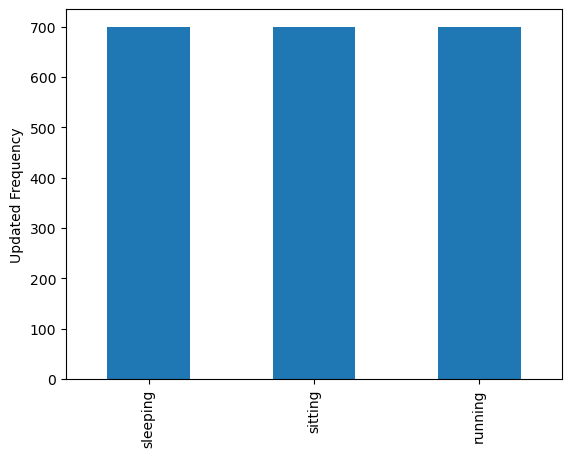

In [36]:
frequency_2=balanced_keypoints['States'].value_counts()
frequency_2.plot(kind='bar')
plt.ylabel('Updated Frequency')

In [37]:
balanced_keypoints.to_csv('balanced_keypoints.csv', index=False)